In [2]:
from numpy import genfromtxt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.spatial import distance
from scipy.stats import multivariate_normal
from matplotlib import cm
from scipy.linalg import eig

In [3]:
# ommit first row in all data sets, those are just indices of the variables
lfp_data = genfromtxt('lfp_data.csv', delimiter=',')[1:, :]
clusterData1 = genfromtxt('clusterData1.csv', delimiter=',')[1:, :]
clusterData2 = genfromtxt('clusterData2.csv', delimiter=',')[1:, :]

Q1:

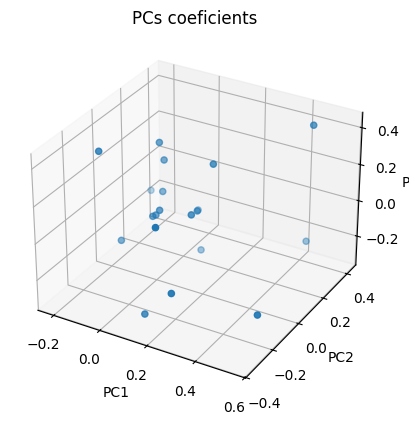

In [ ]:
pca = PCA()
pca.fit(lfp_data)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca.components_[:, 0], pca.components_[:,1], pca.components_[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3') #label is cut in figure, don't know why
ax.set_title('PCs coeficients')
plt.show()
# each point on the grah represents the wheights for each PC.

In [44]:
def myPCA(data):
    mean_data = np.mean(data, axis=0, dtype=float)
    # create matrix of mean data of every column (variable) to subtract it from the main data matrix
    # for normalization:
    diff_mat = np.ones(shape=(data.shape[0],1))*np.reshape(mean_data, shape=(1,data.shape[1]))
    data_norm = data-diff_mat
    cov_mat = np.matmul(data_norm.T,data_norm) # covariance matrix
    eigenvalues, eigenvectors = eig(cov_mat)
    explained_variance = eigenvalues/np.sum(eigenvalues)
    projection = np.matmul(data_norm,eigenvectors) # normalizes data projection on new axes (PCs)
    return eigenvalues, eigenvectors, explained_variance, projection

In [45]:
eigenvalues, eigenvectors, explained_variance, projection = myPCA(lfp_data)

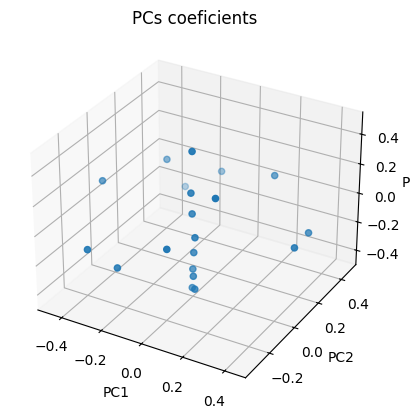

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(eigenvectors[:, 0], eigenvectors[:,1], eigenvectors[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCs coeficients')
plt.show()

Text(0.5, 1.0, 'Values distribution across the different PCs')

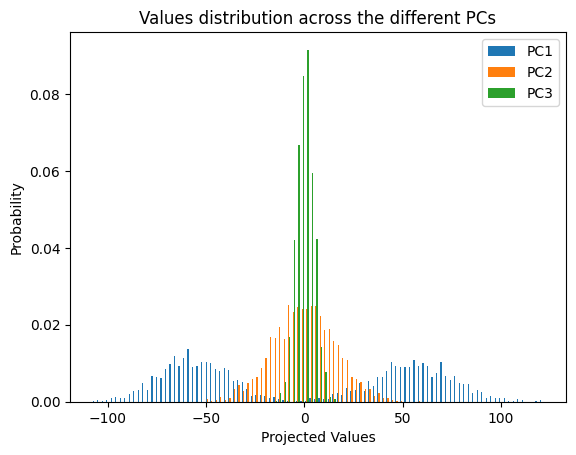

In [39]:
project = pca.transform(lfp_data)
# Plot the histogram of the projection of the original samples on each of the first 3 PCs:
plt.hist(project[:, 0:3], bins=100, label=['PC1','PC2', 'PC3'], density=True)
plt.legend()
plt.xlabel('Projected Values')
plt.ylabel('Probability')
plt.title("Values distribution across the different PCs")

Text(0.5, 1.0, 'Projection of data on PC1 and PC2')

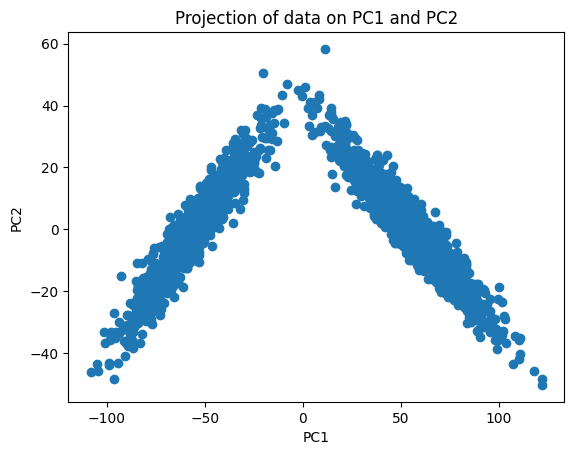

In [38]:
plt.scatter(x= project[:,0], y = project[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection of data on PC1 and PC2")

In [47]:
explained = pca.explained_variance_ratio_
print(f"(Built-in) The variance explained by PC1:{explained[0]*100:.2f}%, PC2: {explained[1]*100:.2f}%\n" \
f"combined:{(explained[0] + explained[1])*100:.2f}%, unexplained by first 2 PCs:{100-(explained[0] + explained[1])*100:.2f}%")

print(f"(My PCA) The variance explained by PC1:{np.real(explained_variance[0])*100:.2f}%, PC2: {np.real(explained_variance[1])*100:.2f}%\n" \
f"combined:{(np.real(explained_variance[0]) + np.real(explained_variance[1]))*100:.2f}%, unexplained by first 2 PCs:{100-(np.real(explained_variance[0] + explained_variance[1]))*100:.2f}%")

(Built-in) The variance explained by PC1:86.59%, PC2: 6.30%
combined:92.88%, unexplained by first 2 PCs:7.12%
(My PCA) The variance explained by PC1:86.59%, PC2: 6.30%
combined:92.88%, unexplained by first 2 PCs:7.12%


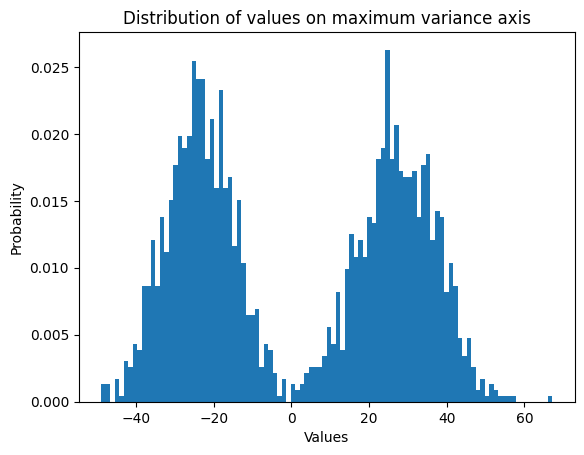

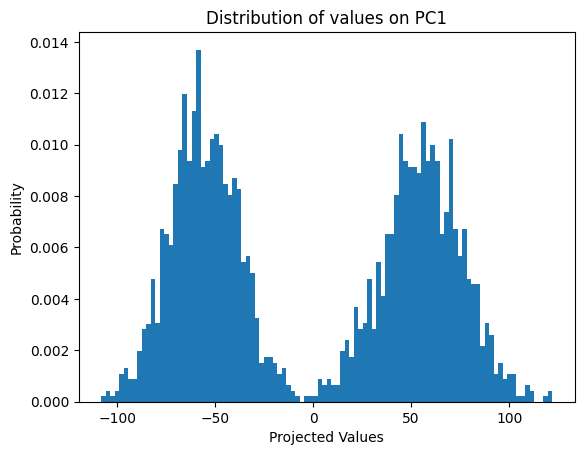

In [ ]:
max_var_feature = lfp_data[:,np.argmax(np.var(lfp_data, axis=0))] # all samples values on the max variance feature
hist_orig, _ = np.histogram(max_var_feature, bins=150, density=True)
plt.hist(max_var_feature, bins=100, density=True)
plt.xlabel("Values")
plt.ylabel("Probability")
plt.title("Distribution of values on maximum variance axis")
H_maxVar = entropy(hist_orig, base=2)
hist_proj, _ = np.histogram(project[:,0], bins=150, density=True)
plt.figure()
plt.hist(project[:,0], bins=100, density=True)
plt.xlabel("Projected Values")
plt.ylabel("Probability")
plt.title("Distribution of values on PC1")
H_proj = entropy(hist_proj, base=2)

In [56]:
print(f"Entropy of maximum variance feature:{H_maxVar:.2f}, Entropy of PC1:{H_proj:.2f}")

Entropy of maximum variance feature:6.59, Entropy of PC1:6.63


Q3:

In [ ]:
def k_means(data):
    old_centroids = {1:[-1,-1], 2:[1,-1], 3:[1,1], 4:[-1,1], 5:[0,-1]}
    new_centroids = {1:[], 2:[], 3:[], 4:[], 5:[]}
    clusters = {1:[], 2:[], 3:[], 4:[], 5:[]}
    distances = [] # of points from centroids
    i = 0 # initialize counter for loop break after 100 itterations

    # while the new_centroids are not equal to old_centroids --> continue ro itterate (until i=100):
    while not np.array_equal(np.array(old_centroids.values()), np.array(new_centroids.values())):
        if i!=0:
            old_centroids = new_centroids
        for point in data: # itterate over data points
            # check the distance of the point from all centroids:
            for _,centroid in old_centroids.items():
                d = distance.euclidean(point, centroid)
                distances.append(d)
            # Take the index of the minimum distance and assign the point to the correct cluster:
            clust_num = np.argmin(distances)+1 
            clusters[clust_num].append(point)
            distances = [] # initiate distances for the next point
        
        # after all points assigned, for each cluster take the mean of the point assigned 
        # to that cluster and set the new centroids:
        for n in range(5):
            new_centroids[n+1] = np.mean(clusters[n+1], axis=0)
            # if no points are assigned to the cluster, set the new centroid as the old one:
            if len(clusters[n+1])==0: 
                new_centroids[n+1] = old_centroids[n+1]
        i+=1
        if i>100:
            break
        clusters = {1:[], 2:[], 3:[], 4:[], 5:[]} # initialize the clusters before new assignment of points
    return clusters, new_centroids


In [311]:
clusters, new_centroids = k_means(clusterData1)

Text(0.5, 1.0, 'K-MEANS CLUSTERING (K=5)')

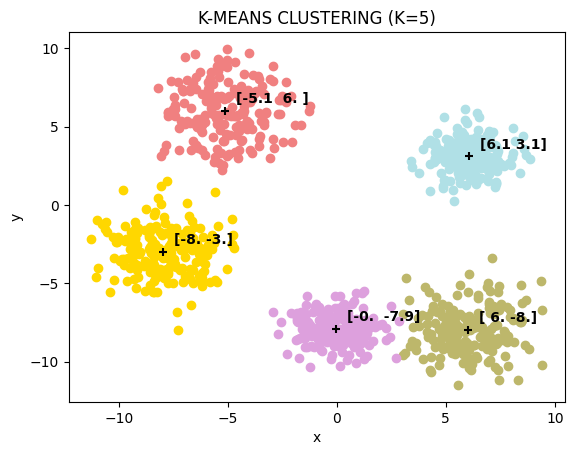

In [ ]:
fig, ax = plt.subplots()
colors = {1:'gold', 2:'darkkhaki', 3:'powderblue', 4:'lightcoral', 5:'plum'}
for key in clusters.keys():
    # scatter the points according to the cluster in the correct color
    ax.scatter(np.array(clusters[key])[:,0],np.array(clusters[key])[:,1], c=colors[key])
    centroid = np.array(new_centroids[key])
    # scatter all centroids in black and annotate with the coordinates of each
    ax.scatter(centroid[0],centroid[1], marker='+', c='k')
    ax.annotate(text=str(np.round(centroid,1)) , xy=centroid, xytext=centroid+0.5, weight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('K-MEANS CLUSTERING (K=5)')

Q4:

Text(0, 0.5, 'Y')

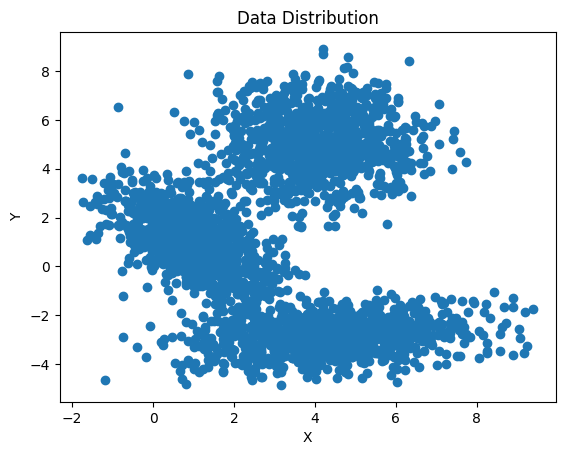

In [39]:
plt.scatter(clusterData2[:,0], clusterData2[:,1])
plt.title('Data Distribution')
plt.xlabel('X')
plt.ylabel('Y')

GMM:
https://gist.github.com/gwgundersen/087da1ac4e2bad5daf8192b4d8f6a3cf

In [ ]:
def init(data, k):# initialize cluster parameters
    n_samples, n_features = data.shape
    means = data[(np.random.choice(n_samples, size=k))] # choose from data points random centroids
    covariances = [np.eye(N=n_features) for _ in range(k)] # initialize with no covariance
    weights = np.ones(k)/k 
    
    return weights, means, covariances

In [5]:
def expectation(data, k, means, covariances, weights):
    n_samples, n_features = data.shape
    # initialize the likelihood of the data, considering parameters + the multivariate normal clusters,
    # considering mean and covariance matrices. 
    likelihood = np.zeros(shape=(n_samples,k))
    gaussians = [multivariate_normal(means[i], covariances[i]) for i in range(k)]

    # Find the likelihood of the data, considering each of the clusters: 
    for i in range(k):
        likelihood[:,i] = gaussians[i].pdf(data)*weights[i]
        
    # probability of a point to belong to each cluster 
    probabilities = likelihood/np.sum(likelihood, axis = 1)[:, np.newaxis]
    return probabilities, likelihood, gaussians


In [6]:
def maximization(data, k, probabilities):
    n_samples, n_features = data.shape
    # calculate the weight for each cluster considering the probabilities of all points in that cluster:
    weights = np.sum(probabilities, axis=0)/n_samples
    # calculate th new mean of each cluster based on the probability of each point to belong to it, 
    # normalize by the sum of probabilities of the points in the cluster:
    means = np.dot(probabilities.T, data)/ np.sum(probabilities, axis=0)[:, np.newaxis]
    # calculate a new covariance matrix (using normalized data) weighted with the probabilities of each point in the cluster:
    covariances = [np.dot(probabilities[:,i]*(data-means[i]).T,(data-means[i]))/np.sum(probabilities[:,i]) for i in range(k)]

    return weights, means, covariances

In [ ]:
k=3
weights, means, covariances = init(clusterData2, k)
new_weights, new_means, new_covariances = np.zeros(weights.shape), np.zeros(means.shape), covariances # initialize for while loop 1st itteration
probabilities, likelihood, gaussians = expectation(clusterData2, k, means, covariances, weights) #initial expectation results using theinitialized parameters
i=0

# like in k-means, continue looping until the new parameters equal the old parameters or i>200:
while not np.array_equal([weights, means, covariances],[new_weights, new_means, new_covariances]):
    weights, means, covariances = new_weights, new_means, new_covariances
    new_weights, new_means, new_covariances = maximization(clusterData2, k, probabilities)
    probabilities, likelihood, gaussians = expectation(clusterData2, k, new_means, new_covariances, new_weights)
    i+=1
    if i>200:
        break

Visualizing multivariate distributions:
https://gist.github.com/gwgundersen/087da1ac4e2bad5daf8192b4d8f6a3cf

Text(0, 0.5, 'Y')

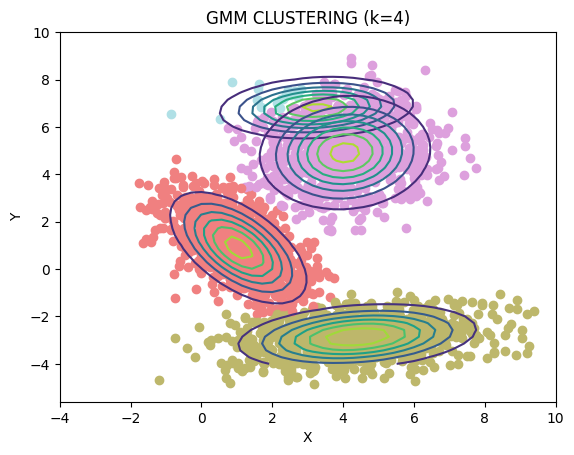

In [30]:
x = np.linspace(-4.0, 10.0)
y = np.linspace(-4.0, 10.0)
X, Y = np.meshgrid(x, y) # create a grid for the contour
fig, ax = plt.subplots()
colors = ['powderblue', 'lightcoral', 'plum', 'darkkhaki']
for sample in range(clusterData2.shape[0]):
    cluster = np.argmax(probabilities[sample]) # assign the point to the cluster where it has the highest probability to belong to that cluster 
    ax.scatter(clusterData2[sample,0], clusterData2[sample,1], c=colors[cluster])
for i in range(k):
    mu = new_means[i]
    sigma = new_covariances[i]
    pos = np.empty(X.shape + (2,)) 
    # stack the linespace positions (X and Y):
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    F = multivariate_normal(mu, sigma) # create a gaussian distribution using the found mean and cov
    Z = F.pdf(pos) # find the pdf of the distribution
    contour_ = ax.contour(X, Y, Z) # countour on the linespace using the PDF of each position to belong to that gaussian
ax.set_title(f'GMM CLUSTERING (k={k})')
ax.set_xlabel('X')
ax.set_ylabel('Y')

